<a href="https://colab.research.google.com/github/Sweta-Das/ML-with-Python/blob/main/2_7_Uncertainty_Estimates_from_Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Though useful, classifiers tend to provide uncertainty estimates of predictions. For e.g., in a medical testing application for cancer, false positive prediction may lead patient undergoing additional tests while, false negative prediction may lead patient not being treated properly.<br/>

2 different functions in sci-kit learn used to obtain uncertainty estimates from classifiers are:<br/>
- decision_function
- predict_proba

# Uncertainty in Binary Classification

In [1]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

In [2]:
import numpy as np

# Removing classes "blue" and "red" for illustration purposes
y_named = np.array(["blue", "red"])[y]

In [12]:
from sklearn.model_selection import train_test_split

# Calling train-test split with arbitrarily many arrays to split all in a consistent manner
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
    train_test_split(X, y_named, y, random_state=0)

In [13]:
# Building the gradient boosting model
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(random_state=0)

### The Decision Function

In [14]:
print("X_test.shape: {}".format(X_test.shape))
print("Decision function shape: {}".format(gbrt.decision_function(X_test).shape))

X_test.shape: (25, 2)
Decision function shape: (25,)


In binary classification, the return value of decision_function() is of shape (n_samples), and it returns one floating point number for each sample. The given value encodes how strongly model believes a data point to belong to the "+ve" class.  

In [17]:
# Showing the first few entries of decision function
print("Decision function:\n{}".format(gbrt.decision_function(X_test)[:6]))

Decision function:
[ 4.13592603 -1.70169917 -3.95106099 -3.62609552  4.28986642  3.66166081]


In [18]:
print("Threshold decision function:\n{}".format(gbrt.decision_function(X_test) > 0))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Threshold decision function:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Predictions:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [19]:
# Making use of "classes_" attribute
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)

# Using 0 and 1 as indices into classes_
pred = gbrt.classes_[greater_zero]

# "pred" is same as the o/p of gbrt.predict()
print("pred is equal to predictions: {}".format(np.all(pred ==
                                                       gbrt.predict(X_test))))

pred is equal to predictions: True


For binary classification, the "negative" class is always the first entry of the "classes_" attribute, and the "positive" class is the 2nd entry of "classes_". To fully recover the o/p of predict, we need to use the "classes_" attribute.

In [20]:
# Finding range of decision function
decision_function = gbrt.decision_function(X_test)
print("Decision function \n minimum: {:.2f} maximum: {:.2f}".format(
    np.min(decision_function), np.max(decision_function)))

Decision function 
 minimum: -7.69 maximum: 4.29


In [ ]:
!pip install mglearn

In [22]:
import mglearn
import matplotlib.pyplot as plt

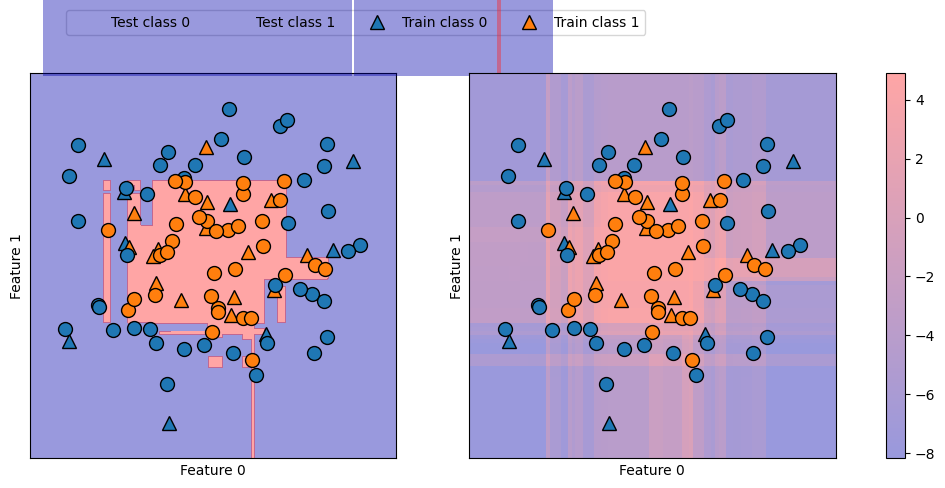

In [23]:
# Plotting the decision function for all points in 2D
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True,
                                cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4,
                                            cm=mglearn.ReBl)

for ax in axes:
  # Plotting training and test points
  mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^',
                           ax=ax)
  mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o',
                           ax=ax)
  ax.set_xlabel("Feature 0")
  ax.set_ylabel("Feature 1")

cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
                "Train class 1"], ncol=4, loc=(.1, 1.1))

Decision boundary (left) and decision function (right) for a gradient boosting model on a 2D toy dataset.

### Predicting Probabilities
"predict_proba" is a probability for each class, and is often more easily understood than the o/p of decision_function.

In [24]:
print("Shape of probabilities: {}".format(gbrt.predict_proba(X_test).shape))

Shape of probabilities: (25, 2)


In [25]:
# Showing the first few entries of predict_proba
print("Predicted probabilities:\n{}".format(gbrt.predict_proba(X_test[:6])))

Predicted probabilities:
[[0.01573626 0.98426374]
 [0.84575653 0.15424347]
 [0.98112869 0.01887131]
 [0.97407033 0.02592967]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


The sum of the probabilities for the 2 classes sums to 1. The class with certainty above 50% is predicted.<br/>
<br/>

A model is called calibrated if the reported uncertainty actually matches how correct it is--in a calibrated model, a prediction made with 70% certainty.


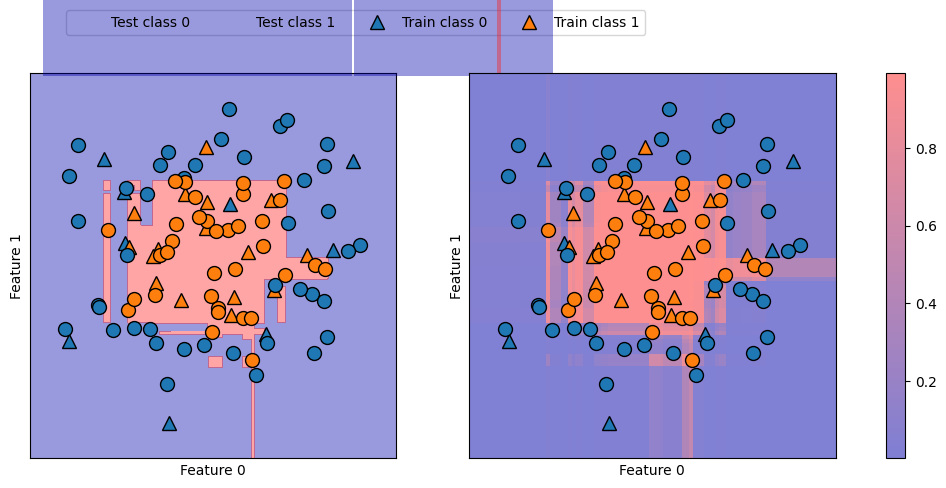

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True,
                                cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.5,
                                            cm=mglearn.ReBl,
                                            function='predict_proba')

for ax in axes:
  # Plotting training and testing points
  mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^',
                           ax=ax)
  mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o',
                           ax=ax)
  ax.set_xlabel("Feature 0")
  ax.set_ylabel("Feature 1")

cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
                "Train class 1"], ncol=4, loc=(.1, 1.1))

Decision boundary (left) and predicted probabilities for the gradient boosting model. The boundaries in this plot are more well-defined, and the small areas of uncertainty are clearly visible.

# Uncertainty in Multiclass Classification